<a href="https://colab.research.google.com/github/sri-mathi/Fall_prediction/blob/main/Fall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

In [ ]:
!pip install yellowbrick

In [ ]:
import warnings
warnings.filterwarnings('always') 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

from yellowbrick.model_selection import learning_curve


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle as shf
import pickle
import os
import glob as gb

In [ ]:
code = {'fall':0 ,'not _fallen':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [ ]:
trainpath='C:/Users/HP/OneDrive/data/train/'
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [ ]:
code = {'fall':0 ,'not_fallen':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [ ]:
testpath='C:/Users/HP/OneDrive/data/val/'
X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [ ]:
loaded_X_train = np.load('./X_train.npy')
loaded_X_test = np.load('./X_test.npy')
loaded_y_train = np.load('./y_train.npy')
loaded_y_test = np.load('./y_test.npy')

In [ ]:
print(loaded_X_train.shape)

(374, 64, 64, 3)


In [ ]:
print(loaded_X_test.shape)

(89, 64, 64, 3)


In [ ]:
print(loaded_y_train.shape)
print(loaded_y_test.shape)

(374,)
(89,)


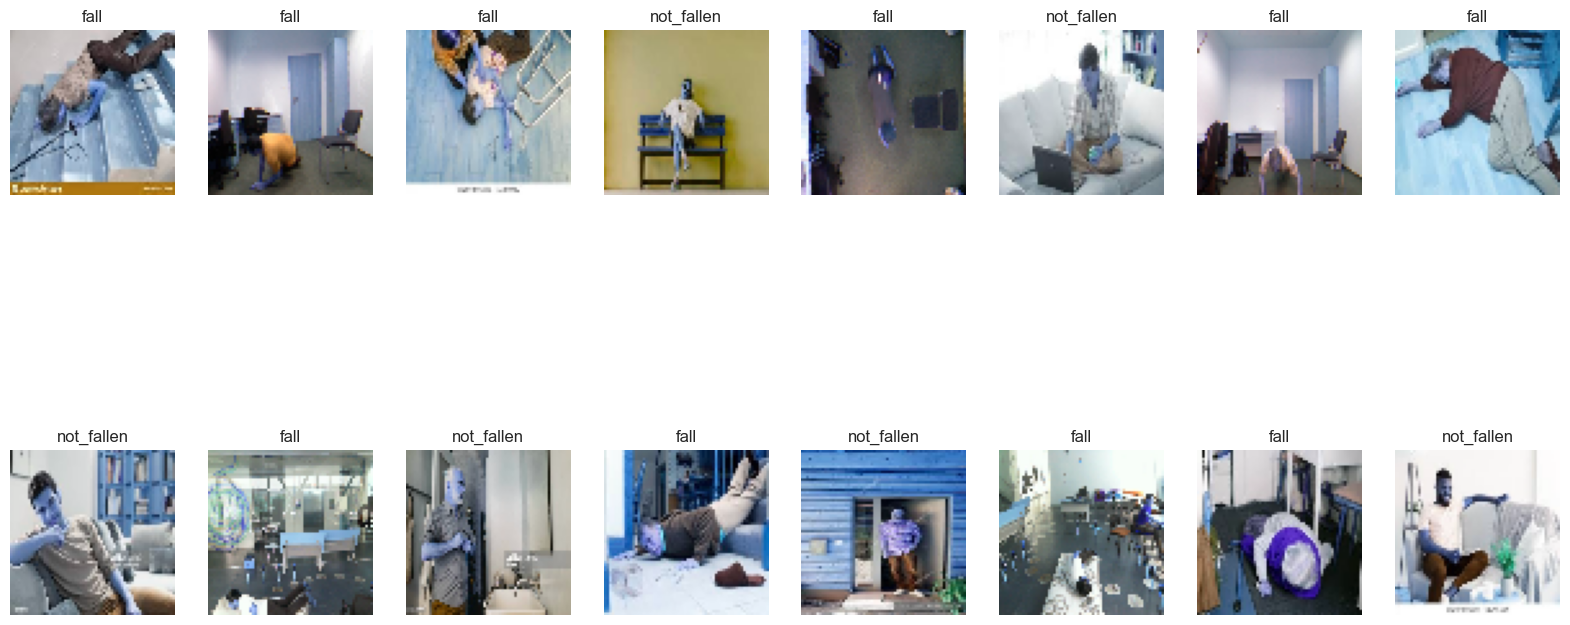

In [ ]:
plt.figure(figsize=(20,10))
for n , i in enumerate(np.random.randint(0,len(loaded_X_train),16)): 
    plt.subplot(2,8,n+1)
    plt.imshow(loaded_X_train[i])
    plt.axis('off')
    plt.title(getcode(loaded_y_train[i]))

In [ ]:
X_train = loaded_X_train.reshape([-1, np.product((64,64,3))])
X_test = loaded_X_test.reshape([-1, np.product((64,64,3))])

In [ ]:
print(X_train.shape)
print(X_test.shape)

(374, 12288)
(89, 12288)


In [ ]:
y_train = loaded_y_train
y_test = loaded_y_test

In [ ]:
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_pred1=knn.predict(X_test)
print('KNN accuracy score is: ' + str(knn.score(X_test, y_test)))

KNN accuracy score is: 0.7191011235955056


In [ ]:
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[62  8]
 [17  2]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        70
           1       0.20      0.11      0.14        19

    accuracy                           0.72        89
   macro avg       0.49      0.50      0.49        89
weighted avg       0.66      0.72      0.68        89



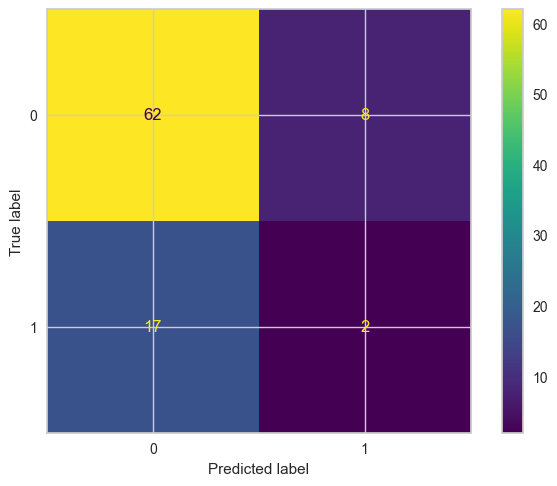

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6629213483146067

In [ ]:
y_pred2=model.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[50 20]
 [10  9]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        70
           1       0.31      0.47      0.38        19

    accuracy                           0.66        89
   macro avg       0.57      0.59      0.57        89
weighted avg       0.72      0.66      0.69        89



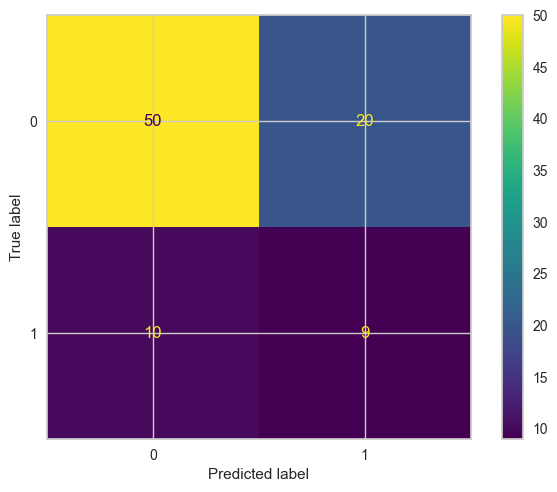

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=10)
model1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=10)

In [ ]:
y_pred3=model1.predict(X_test)
res=pd.DataFrame({'Actual':y_test,'predicted':y_pred3})
res

,Actual,predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1
...,...,...
84,0,0
85,0,0
86,0,0
87,0,1


In [ ]:
print(metrics.confusion_matrix(y_test,y_pred3))
print(metrics.classification_report(y_test,y_pred3))

[[56 14]
 [11  8]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        70
           1       0.36      0.42      0.39        19

    accuracy                           0.72        89
   macro avg       0.60      0.61      0.60        89
weighted avg       0.74      0.72      0.73        89



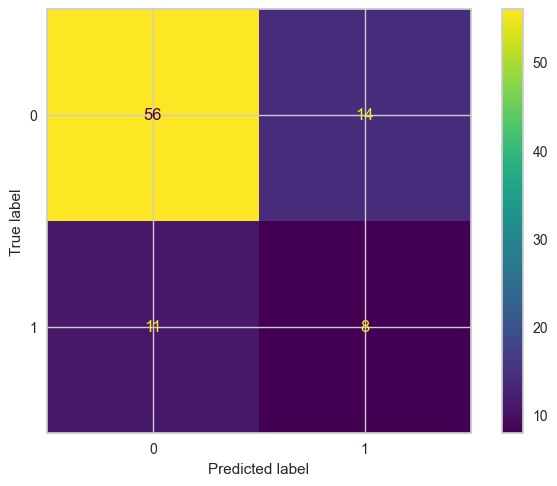

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
np = GaussianNB(var_smoothing=2e+12)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
np.fit(X_train1,y_train)

GaussianNB(var_smoothing=2000000000000.0)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y_pred4=np.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred4))
print(metrics.classification_report(y_test,y_pred4))
metrics.f1_score(y_test, y_pred4, average='weighted')

[[70  0]
 [19  0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        70
           1       0.00      0.00      0.00        19

    accuracy                           0.79        89
   macro avg       0.39      0.50      0.44        89
weighted avg       0.62      0.79      0.69        89



0.6925305632110804

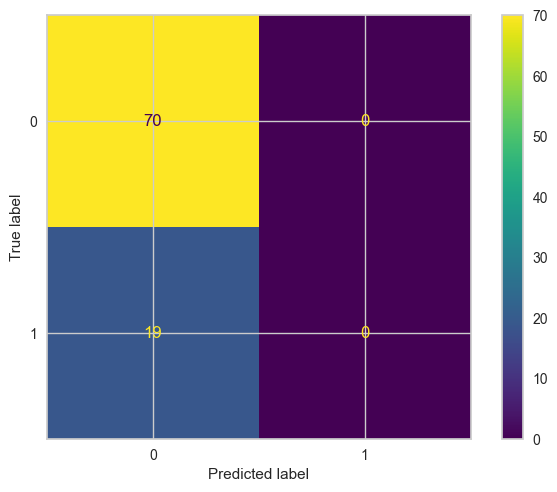

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=1.0, degree=3, gamma='auto', kernel='rbf')
svm.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
print('Support Vector Machine Classifier accuracy score is: ' + str(svm.score(X_test, y_test)))

Support Vector Machine Classifier accuracy score is: 0.7865168539325843


In [ ]:
y_pred5=svm.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred5))
print(metrics.classification_report(y_test,y_pred5))

[[70  0]
 [19  0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        70
           1       0.00      0.00      0.00        19

    accuracy                           0.79        89
   macro avg       0.39      0.50      0.44        89
weighted avg       0.62      0.79      0.69        89



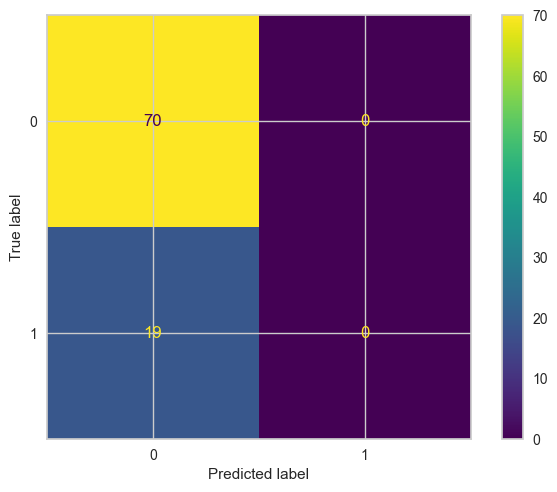

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha=0.6)
MNB.fit(X_train,y_train)

MultinomialNB(alpha=0.6)

In [ ]:
y_pred6=MNB.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred6))
print(metrics.classification_report(y_test,y_pred6))
metrics.f1_score(y_test, y_pred6, average='weighted')

[[40 30]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.89      0.57      0.70        70
           1       0.32      0.74      0.44        19

    accuracy                           0.61        89
   macro avg       0.60      0.65      0.57        89
weighted avg       0.77      0.61      0.64        89



0.6420235575096346

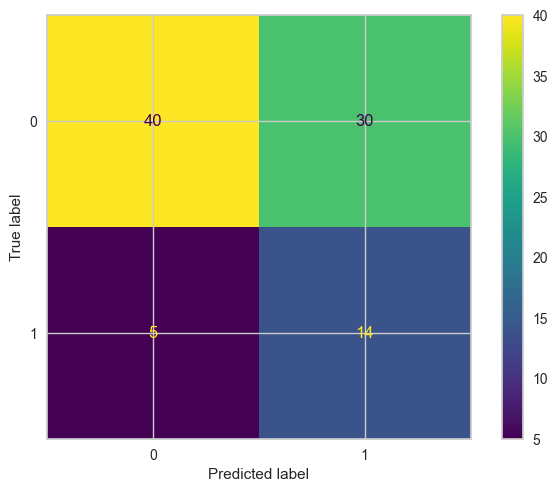

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred6)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB(fit_prior = False)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
BNB.fit(X_train1,y_train)

BernoulliNB(fit_prior=False)

In [ ]:
y_pred7=BNB.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred7))
print(metrics.classification_report(y_test,y_pred7))
metrics.f1_score(y_test, y_pred7, average='weighted')

[[69  1]
 [18  1]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88        70
           1       0.50      0.05      0.10        19

    accuracy                           0.79        89
   macro avg       0.65      0.52      0.49        89
weighted avg       0.73      0.79      0.71        89



0.7116650138191684

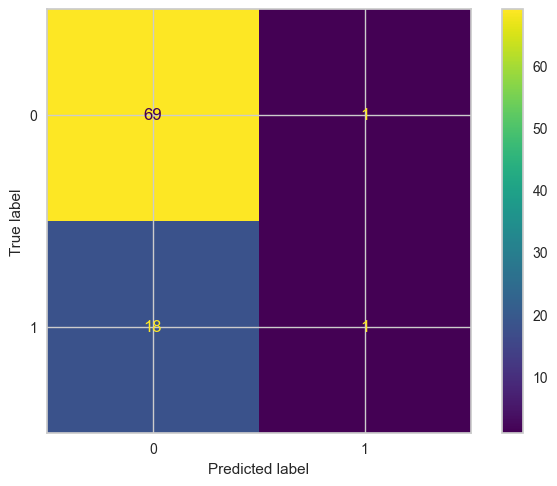

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred7)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB(norm = True)
CNB.fit(X_train,y_train)

ComplementNB(norm=True)

In [ ]:
y_pred8=CNB.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred8))
print(metrics.classification_report(y_test,y_pred8))
metrics.f1_score(y_test, y_pred8, average='weighted')

[[43 27]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.90      0.61      0.73        70
           1       0.34      0.74      0.47        19

    accuracy                           0.64        89
   macro avg       0.62      0.68      0.60        89
weighted avg       0.78      0.64      0.67        89



0.6728496159461689

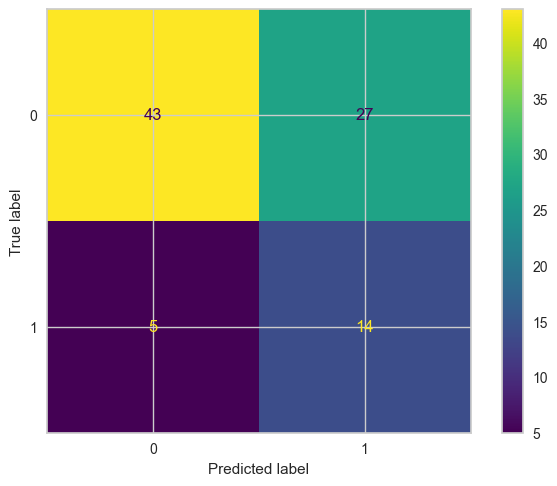

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred8)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
logr.fit(X_train1,y_train)

LogisticRegression()

In [ ]:
y_pred9=logr.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred9))
print(metrics.classification_report(y_test,y_pred9))

[[41 29]
 [ 5 14]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        70
           1       0.33      0.74      0.45        19

    accuracy                           0.62        89
   macro avg       0.61      0.66      0.58        89
weighted avg       0.77      0.62      0.65        89



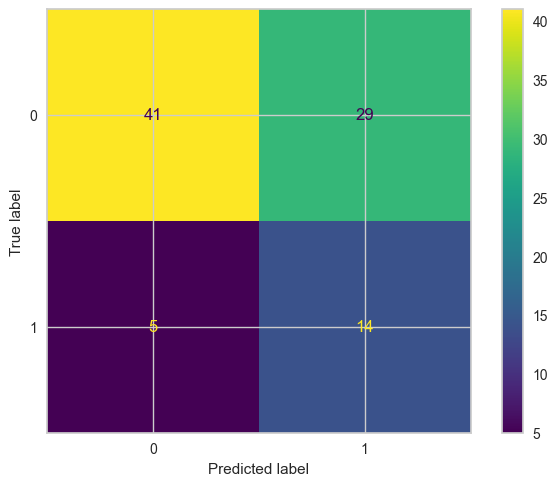

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred9)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier()
clf.fit(X_train,y_train)

RidgeClassifier()

In [ ]:
y_pred10=clf.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred10))
print(metrics.classification_report(y_test,y_pred10))

[[43 27]
 [ 8 11]]
              precision    recall  f1-score   support

           0       0.84      0.61      0.71        70
           1       0.29      0.58      0.39        19

    accuracy                           0.61        89
   macro avg       0.57      0.60      0.55        89
weighted avg       0.72      0.61      0.64        89



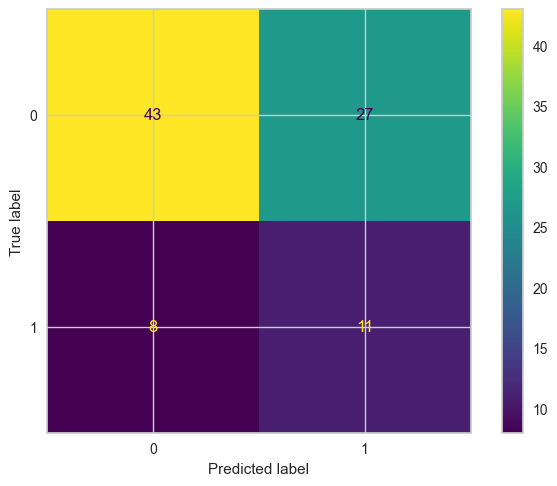

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred10)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
per = Perceptron(tol=1e-3,random_state=3)
per.fit(X_train_scaled, y_train)

Perceptron(random_state=3)

In [ ]:
y_pred11=per.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred11))
print(metrics.classification_report(y_test,y_pred11))

[[56 14]
 [14  5]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        70
           1       0.26      0.26      0.26        19

    accuracy                           0.69        89
   macro avg       0.53      0.53      0.53        89
weighted avg       0.69      0.69      0.69        89



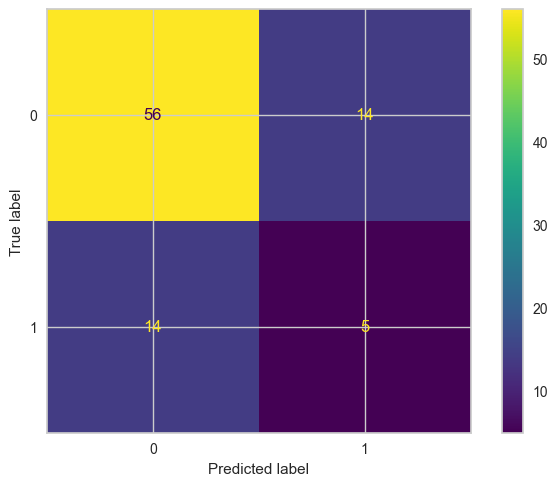

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred11)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
import numpy as np

def random_shift(data, max_shift):
    """
    Randomly shift the data by a value within the given maximum shift range.
    """
    shift = np.random.uniform(-max_shift, max_shift)
    return data + shift

def random_scale(data, min_scale, max_scale):
    """
    Randomly scale the data by a value within the given scale range.
    """
    scale = np.random.uniform(min_scale, max_scale)
    return data * scale

def random_noise(data, noise_factor):
    """
    Add random noise to the data based on the given noise factor.
    """
    noise = np.random.normal(scale=noise_factor, size=data.shape)
    return data + noise

# Example usage
x_train = np.random.random((374, 12288))
y_train = np.random.randint(0, 10, size=(374,))

augmented_x_train = []
augmented_y_train = []

# Generate augmented data
for _ in range(10):
    augmented_x = []
    augmented_y = []
    for i in range(len(x_train)):
        augmented_sample = random_shift(x_train[i], max_shift=0.2)
        augmented_sample = random_scale(augmented_sample, min_scale=0.8, max_scale=1.2)
        augmented_sample = random_noise(augmented_sample, noise_factor=0.05)
        augmented_x.append(augmented_sample)
        augmented_y.append(random_shift(y_train[i], max_shift=0.2))
    augmented_x_train.append(augmented_x)
    augmented_y_train.append(augmented_y)

augmented_x_train = np.array(augmented_x_train)
augmented_y_train = np.array(augmented_y_train)

print(augmented_x_train.shape)  
print(augmented_y_train.shape)  


(10, 374, 12288)
(10, 374)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

augmented_x_train = augmented_x_train.reshape(-1, 12288)
augmented_y_train = augmented_y_train.reshape(-1)

x_train, x_val, y_train, y_val = train_test_split(augmented_x_train, augmented_y_train, test_size=0.2)


regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_val)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.19228434712799347


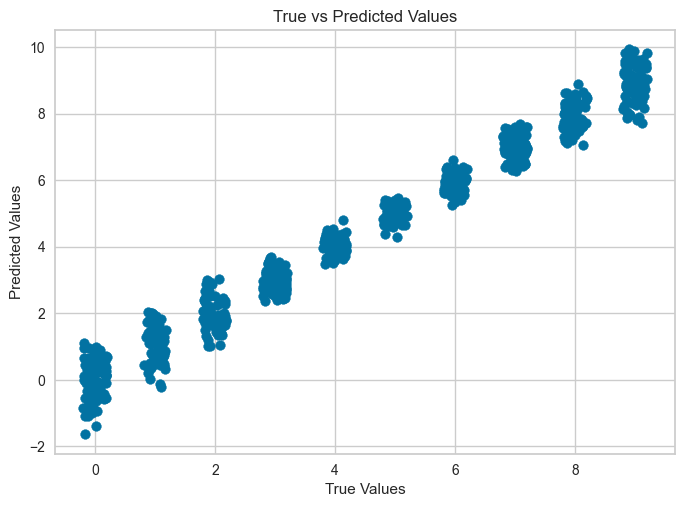

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_val, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest
modell = IsolationForest()
modell.fit(X_train,y_train)
train_scores = modell.decision_function(X_train)
train_scores= modell.decision_function(X_test)

In [ ]:
threshold =-1
train_predictions = (train_scores < threshold).astype(int)
test_predictions = (test_scores < threshold).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
A = accuracy_score(y_test, test_predictions)
print("Accuracy-score:", A)

Accuracy-score: 0.7865168539325843
